# Instruções de como realizar os testes
*Execute todas as células abaixo até a seção "Datasets reais"*
*Em seguida, escolha e execute uma das células dessa seção para inicializar o dataset correspondente*
*Por fim basta executar todas as células da "Seção de testes"*

**Imports**

In [1]:
import time
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

**Distância**

In [2]:
def dist_minkowski(ponto1, ponto2, p):
    return np.sum(np.abs(ponto1 - ponto2) ** p) ** (1 / p)

**Cálculo da Matriz de Distâncias**

In [3]:
def matrizDistancias(pontos, tamanho, p):
    matriz = np.zeros((tamanho, tamanho))
    tam = len(pontos)
    for i in range(tam):
        for j in range(tam):
            distancia = dist_minkowski(pontos[i][1], pontos[j][1], p)
            matriz[i, j] = distancia
    return matriz

**Rotulamento**

In [4]:
def rotular_pontos(S, C, matriz):
    labels = []
    tamanho = len(S)
    for indiceLinha in range(tamanho):
        distancias = []
        for centro in C:
            indiceColuna = centro[0]
            distancias.append(matriz[indiceLinha][indiceColuna])
        labels.append(np.argmin(distancias))
    return np.array(labels)

**K-Centros, Primeira Abordagem**

In [5]:
def removerPtos2r(S2, s, r, matriz):
    dist2r = 2 * r
    Slista = S2.tolist()
    Snumpy = S2
    for i in range(len(Slista)):
        Slista[i] = list(Slista[i])
    indiceLinha = s[0]
    for outro in Snumpy:
        indiceColuna = outro[0]
        distaux = matriz[indiceLinha][indiceColuna]
        if distaux <= dist2r:
            outroLista = list(outro)
            Slista.remove(outroLista)
    S4 = np.array(Slista, dtype=object)
    return S4

In [6]:
def kCentrosComplicado(S, k, matriz, r):
    S2 = S
    C = []
    tamanhoS2 = len(S2)
    while tamanhoS2 != 0:
        s = S2[0]
        C.append(s)
        S2 = removerPtos2r(S2, s, r, matriz)
        tamanhoS2 = len(S2)
        tamanhoC = len(C)
    if tamanhoC <= k:
        return (C, True)
    else:
        return (False, False)

In [7]:
def descobrirraiomax(matriz):
    maxDist = np.max(matriz)
    return maxDist

In [8]:
def descobrirRaio(S, k, matriz, porcentagem):
    rmax = descobrirraiomax(matriz)
    low, high = 0, rmax
    convergencia = high - low
    while convergencia > (rmax * porcentagem / 100):
        meio = (low + high) / 2
        resultado = kCentrosComplicado(S, k, matriz, meio)
        if resultado[1] is True:
            high = meio
        else:
            low = meio
        convergencia = high - low
    resultado2 = resultado[0]
    if resultado2 is False:
        return 'Sem solução'
    else:
        resultado3 = [item[1] for item in resultado2]
        return (resultado2, high, resultado3)

**K-Centros, Segunda abordagem**

In [9]:
def maxDist(S, C, matriz):
    sMax = []
    distMax = 0
    menores = []
    tamanho = len(S)
    for s in range(tamanho):
        distancias = [matriz[s][c[0]] for c in C]
        indice = np.argmin(distancias)
        elemento = distancias[indice]
        menores.append(elemento) #pra cada ponto, vejo a menor distância entre s e qualquer ponto de C
    indiceMax = np.argmax(menores)
    distMax = menores[indiceMax]
    sMax = S[indiceMax]
    return sMax, distMax

In [10]:
def kCentrosSimples(S, k, matriz):
    tamanhoS = len(S)
    C = []
    if k >= tamanhoS:
        return S
    sArbitrario = S[0]
    C.append(sArbitrario)
    tamanhoC = len(C)
    raio = 0
    while tamanhoC < k:
        s, raioaux = maxDist(S, C, matriz)
        C.append(s)
        tamanhoC = len(C)
        if raioaux > raio:
            raio = raioaux
    centros = [item[1] for item in C]
    return (C, raio, centros)

**K-Means**

In [20]:
def myKMeans(df, k, rotulos_reais):
    # Normalizar os dados
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    # Prever os clusters
    labels = kmeans.predict(df_scaled)
    # Centroides dos clusters
    centros = kmeans.cluster_centers_
    silhueta = silhouette_score(pontos1, labels)
    true_labels = rotulos_reais
    rand_ajustado = adjusted_rand_score(true_labels, labels)
    return (labels, centros, silhueta, rand_ajustado)

# Dataset reais
*Escolha e execute uma das células seguintes para inicializar o dataset correspondente*


**Dataset 1**

In [ ]:
# URL do dataset Adult no UCI Machine Learning Repository
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names_adult = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
adult = pd.read_csv(url_adult, names=column_names_adult, na_values=' ?', skipinitialspace=True)
# Remover a coluna de classes e quaisquer colunas não numéricas
df_adult = adult.select_dtypes(include=['int64', 'float64'])
nclusters = adult['income'].nunique()

pontos1 = df_adult.head(700).values
rotulos_reais = adult['income'].head(700) #última coluna do dataframe

**Dataset 2**

In [ ]:
# URL do dataset Wine Quality (Vinho Tinto) no UCI Machine Learning Repository
url_wine_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
column_names_wine_red = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
    'alcohol', 'quality'
]

# Carregar o dataset
wine_red = pd.read_csv(url_wine_red, names=column_names_wine_red, sep=';', header=0)

# Remover a coluna de classes e quaisquer colunas não numéricas
df_wine_red = wine_red.select_dtypes(include=['int64', 'float64'])
nclusters = wine_red['quality'].nunique()

pontos1 = df_wine_red.head(700).values
rotulos_reais = wine_red['quality'].head(700) #última coluna do dataframe

**Dataset 3**

In [ ]:
# URL do dataset Wine Quality (Vinho Branco) no UCI Machine Learning Repository
url_wine_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
column_names_wine_white = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
    'alcohol', 'quality'
]

# Carregar o dataset
wine_white = pd.read_csv(url_wine_white, names=column_names_wine_white, sep=';', header=0)

# Remover a coluna de classes e quaisquer colunas não numéricas
df_wine_white = wine_white.select_dtypes(include=['int64', 'float64'])
nclusters = wine_white['quality'].nunique()

pontos1 = df_wine_white.head(700).values
rotulos_reais = wine_white['quality'].head(700) #última coluna do dataframe

**Dataset 4**

In [ ]:
# URL do dataset Letter Recognition no UCI Machine Learning Repository
url_letter = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names_letter = [
    'letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar',
    'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'
]

# Carregar o dataset
letter = pd.read_csv(url_letter, names=column_names_letter, header=None)

# Remover a coluna de classes e quaisquer colunas não numéricas
df_letter = letter.select_dtypes(include=['int64', 'float64'])
nclusters = letter['letter'].nunique()

pontos1 = df_letter.head(700).values
rotulos_reais = letter['letter'].head(700) #última coluna do dataframe

**Dataset 5**

In [ ]:
# URL do dataset Poker Hand no UCI Machine Learning Repository
url_poker = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
column_names_poker = [
    'S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class'
]

# Carregar o dataset
poker = pd.read_csv(url_poker, names=column_names_poker, header=None)

# Remover a coluna de classes e quaisquer colunas não numéricas
df_poker = poker.select_dtypes(include=['int64', 'float64'])
nclusters = poker['class'].nunique()

pontos1 = df_poker.head(700).values
rotulos_reais = poker['class'].head(700) #última coluna do dataframe

**Dataset 6**

In [ ]:
# URL do dataset Contraceptive Method Choice no UCI Machine Learning Repository
url_cmc = "https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"
column_names_cmc = [
    'wife_age', 'wife_education', 'husband_education', 'num_children',
    'wife_religion', 'wife_working', 'husband_occupation', 'standard_of_living',
    'media_exposure', 'contraceptive_method'
]

# Carregar o dataset
cmc = pd.read_csv(url_cmc, names=column_names_cmc, header=None)

# Remover a coluna de classes e quaisquer colunas não numéricas
df_cmc = cmc.select_dtypes(include=['int64', 'float64'])
nclusters = cmc['contraceptive_method'].nunique()

pontos1 = df_cmc.head(700).values
rotulos_reais = cmc['contraceptive_method'].head(700) #última coluna do dataframe

**Dataset 7**

In [ ]:
# URL do dataset Covertype no UCI Machine Learning Repository
url_covertype = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

# Carregar o dataset
column_names_covertype = [
    'elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology',
    'vertical_distance_to_hydrology', 'horizontal_distance_to_roadways',
    'hillshade_9am', 'hillshade_noon', 'hillshade_3pm', 'horizontal_distance_to_fire_points',
    'wilderness_area1', 'wilderness_area2', 'wilderness_area3', 'wilderness_area4',
    'soil_type1', 'soil_type2', 'soil_type3', 'soil_type4', 'soil_type5', 'soil_type6',
    'soil_type7', 'soil_type8', 'soil_type9', 'soil_type10', 'soil_type11', 'soil_type12',
    'soil_type13', 'soil_type14', 'soil_type15', 'soil_type16', 'soil_type17', 'soil_type18',
    'soil_type19', 'soil_type20', 'soil_type21', 'soil_type22', 'soil_type23', 'soil_type24',
    'soil_type25', 'soil_type26', 'soil_type27', 'soil_type28', 'soil_type29', 'soil_type30',
    'soil_type31', 'soil_type32', 'soil_type33', 'soil_type34', 'soil_type35', 'soil_type36',
    'soil_type37', 'soil_type38', 'class'
]
covertype = pd.read_csv(url_covertype, names=column_names_covertype, header=None)
# print(covertype.shape)
# Remover a coluna de classes e quaisquer colunas não numéricas
df_covertype = covertype.select_dtypes(include=['int64', 'float64'])
nclusters = covertype['class'].nunique()

pontos1 = df_covertype.head(700).values
rotulos_reais = covertype['class'].head(700) #última coluna do dataframe

**Dataset 8**

In [ ]:
# URL do dataset Spambase no UCI Machine Learning Repository
url_spambase = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Carregar o dataset
column_names_spambase = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'class'
]
spambase = pd.read_csv(url_spambase, names=column_names_spambase, header=None)

# Remover a coluna de classes e quaisquer colunas não numéricas
df_spambase = spambase.select_dtypes(include=['int64', 'float64'])
nclusters = spambase['class'].nunique()
pontos1 = df_spambase.head(700).values
rotulos_reais = spambase['class'].head(700) #última coluna do dataframe

**Dataset 9**

In [12]:
import pandas as pd

# URL do dataset Mammographic Mass no UCI Machine Learning Repository
url_mammographic_mass = "https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"

# Carregar o dataset
column_names_mammographic_mass = [
    'BI_RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'
]
mammographic_mass = pd.read_csv(url_mammographic_mass, names=column_names_mammographic_mass, header=None, na_values='?')
aux = mammographic_mass.dropna()
mammographic_mass = aux
# Remover a coluna de classes e quaisquer colunas não numéricas
df_mammographic_mass = mammographic_mass.select_dtypes(include=['int64', 'float64'])
nclusters = mammographic_mass['Severity'].nunique()

# Verificar o número de instâncias
# num_instancias_mammographic_mass = df_mammographic_mass.shape[0]
# tamanho = num_instancias_mammographic_mass

pontos1 = df_mammographic_mass.tail(700).values
rotulos_reais = mammographic_mass['Severity'].tail(700) #última coluna do dataframe

(830, 6)


**Dataset 10**

In [ ]:
# URL do dataset German Credit no UCI Machine Learning Repository
url_german_credit = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names_german_credit = [
    'checking_account_status', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings_account/bonds', 'employment', 'installment_as_income_perc', 'personal_status',
    'other_debtors', 'present_residence_since', 'property_magnitude', 'age', 'other_payment_plans',
    'housing', 'number_of_credits', 'job', 'liable_others', 'telephone', 'foreign_worker', 'class'
]
german_credit = pd.read_csv(url_german_credit, names=column_names_german_credit, header=None, delim_whitespace=True, na_values='?')

# Remover a coluna de classes e quaisquer colunas não numéricas
df_german_credit = german_credit.select_dtypes(include=['int64', 'float64'])
nclusters = german_credit['class'].nunique()

pontos1 = df_german_credit.head(700).values
rotulos_reais = german_credit['class'].head(700) #última coluna do dataframe

# Seção de testes
*Para a realização de todos os testes, basta executar as células seguintes em sequência*

In [13]:
tuplas = [(i, ponto) for i, ponto in enumerate(pontos1)]
# p = 1
k = nclusters
# porcentagem = 1
pontos = np.array(tuplas, dtype=object)
tamanho = pontos1.shape[0]
# matriz = matrizDistancias(pontos, tamanho, p)

In [ ]:
start = time.time()
resposta = descobrirRaio(pontos, k, matriz, porcentagem)
processing_time = time.time() - start
if resposta == 'Não há Solução para esses parâmetros':
    print(f'o tempo foi {processing_time}')
    print(f'Não foi possível calcular os rótulos, o raio, os centros, o coeficente da Silhueta e o índice de Rand ajustado, pois {resposta}')
else:
    centros = resposta[0]
    labels_pred = rotular_pontos(pontos, centros, matriz)
    num_labels_unicos = len(np.unique(labels_pred))
    if num_labels_unicos == 1:
        print(f'o tempo foi {processing_time}')
        print(f'Não foi possível calcular os rótulos, o raio, os centros, o coeficente da Silhueta e o índice de Rand ajustado, pois {resposta}')    
    else:
        silhueta = silhouette_score(pontos1, labels_pred)
        true_labels = rotulos_reais
        rand_ajustado = adjusted_rand_score(true_labels, labels_pred)
       

In [15]:
resultados = pd.DataFrame(columns=['Raio da solução','Média de Tempos','Desvio padrão de Tempos','Silhueta','Índice de Rand ajustado'])
tempos = np.zeros(30)
porcentagens = [1,7,13,19,25]
for p in range(1,3):
    matriz = matrizDistancias(pontos, tamanho, p)
    for s in range(5):
        porcentagem = porcentagens[s]
        for i in range(30):
            start = time.time()
            resposta = descobrirRaio(pontos, k, matriz, porcentagem)
            processing_time = time.time() - start
            tempos[i] = round(processing_time, 3)
        if resposta == 'Sem solução':
            nova_linha = pd.DataFrame([{'Raio da solução':'Sem solução','Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':'Sem solução','Índice de Rand ajustado':'Sem solução'}])
        else:
            centros = resposta[0]
            labels_pred = rotular_pontos(pontos, centros, matriz)
            num_labels_unicos = len(np.unique(labels_pred))
            if num_labels_unicos == 1:
                 nova_linha = pd.DataFrame([{'Raio da solução':'Sem solução','Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':'Sem solução','Índice de Rand ajustado':'Sem solução'}])
            else:
                silhueta = silhouette_score(pontos1, labels_pred)
                true_labels = rotulos_reais
                rand_ajustado = adjusted_rand_score(true_labels, labels_pred)
                nova_linha = pd.DataFrame([{'Raio da solução':round(resposta[1],3),'Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':round(silhueta,3),'Índice de Rand ajustado':round(rand_ajustado,3)}])
        resultados = pd.concat([resultados,nova_linha],ignore_index=True)

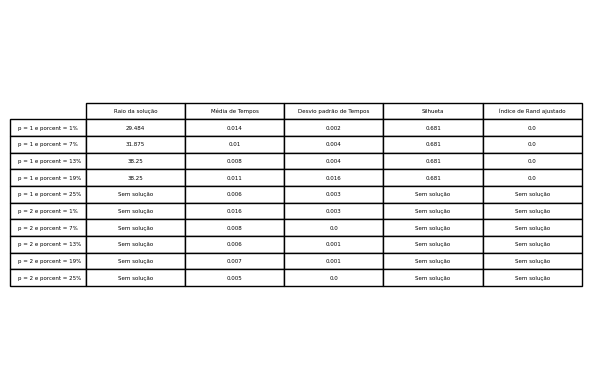

In [16]:
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
rotulos_iteracoes = ['p = 1 e porcent = 1%', 'p = 1 e porcent = 7%', 'p = 1 e porcent = 13%', 'p = 1 e porcent = 19%','p = 1 e porcent = 25%',
                    'p = 2 e porcent = 1%','p = 2 e porcent = 7%','p = 2 e porcent = 13%','p = 2 e porcent = 19%','p = 2 e porcent = 25%']
table = ax.table(cellText=resultados.values,
                 colLabels=resultados.columns,
                 rowLabels=rotulos_iteracoes,
                 loc='center', cellLoc='center', edges='closed')
table.scale(1, 1)
plt.savefig('Tabela_1.png',bbox_inches='tight',dpi=300)

In [17]:
resultados = pd.DataFrame(columns=['Raio da solução','Média de Tempos','Desvio padrão de Tempos','Silhueta','Índice de Rand ajustado'])
tempos = np.zeros(30)
for p in range(1,3):
    matriz = matrizDistancias(pontos, tamanho, p)
        
    for i in range(30):
        start = time.time()
        resultado = kCentrosSimples(pontos, k, matriz)
        processing_time = time.time() - start
        tempos[i] = round(processing_time,3)
        
    centros = resultado[0]
    labels_pred = rotular_pontos(pontos, centros, matriz)
    silhueta = silhouette_score(pontos1, labels_pred)
    true_labels = rotulos_reais
    rand_ajustado = adjusted_rand_score(true_labels, labels_pred)
    nova_linha = pd.DataFrame([{'Raio da solução':round(resultado[1],3),'Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':round(silhueta,3),'Índice de Rand ajustado':round(rand_ajustado,3)}])
    resultados = pd.concat([resultados,nova_linha],ignore_index=True)

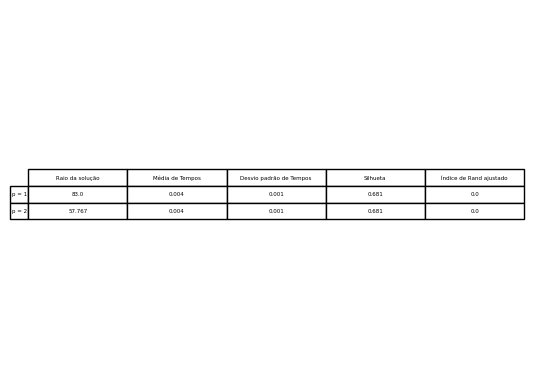

In [18]:
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
rotulos_iteracoes = ['p = 1', 'p = 2']
table = ax.table(cellText=resultados.values,
                 colLabels=resultados.columns,
                 rowLabels=rotulos_iteracoes,
                 loc='center', cellLoc='center', edges='closed')
table.scale(1, 1)
plt.savefig('Tabela_2.png',bbox_inches='tight',dpi=300)

In [21]:
resultados = pd.DataFrame(columns=['Média de Tempos','Desvio padrão de Tempos','Silhueta','Índice de Rand ajustado'])
tempos = np.zeros(30)
for i in range(30):
    start = time.time()
    resultado = myKMeans(pontos1, k, rotulos_reais)
    processing_time = time.time() - start
    tempos[i] = round(processing_time,3)

nova_linha = pd.DataFrame([{'Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':round(resultado[2],3),'Índice de Rand ajustado':round(resultado[3],3)}])
resultados = pd.concat([resultados,nova_linha],ignore_index=True)

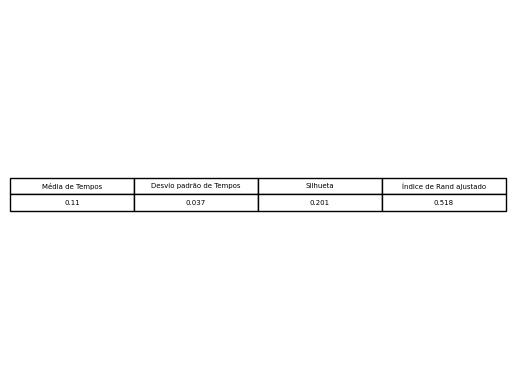

In [22]:
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=resultados.values,
                 colLabels=resultados.columns,
                 loc='center', cellLoc='center', edges='closed')
table.scale(1, 1)
plt.savefig('Tabela_3.png',bbox_inches='tight',dpi=300)